### Business Problem
In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem.

The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.

### Import Libraries

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv("hotel_booking.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


### EDA Data Cleaning

In [123]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [124]:
df.shape

(119390, 36)

In [125]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [127]:
# Chage the Datetime

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [128]:
df.describe(include = 'object')  # Value counts of categorical column

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,422-804-6403,************3627
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [129]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [130]:
# Missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [131]:
percentage_missing = (df.isnull().sum() / len(df)) * 100
percentage_missing

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [132]:
df.drop(['agent', 'company'], axis=1, inplace = True)
df.dropna(inplace = True)

In [133]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [134]:
# Summary Statistics of Numerical columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
is_canceled,118898.0,0.371352,0.0,0.0,0.0,1.0,1.0,0.483168
lead_time,118898.0,104.311435,0.0,18.0,69.0,161.0,737.0,106.903309
arrival_date_year,118898.0,2016.157656,2015.0,2016.0,2016.0,2017.0,2017.0,0.707459
arrival_date_week_number,118898.0,27.166555,1.0,16.0,28.0,38.0,53.0,13.589971
arrival_date_day_of_month,118898.0,15.80088,1.0,8.0,16.0,23.0,31.0,8.780324
stays_in_weekend_nights,118898.0,0.928897,0.0,0.0,1.0,2.0,16.0,0.996216
stays_in_week_nights,118898.0,2.502145,0.0,1.0,2.0,3.0,41.0,1.900168
adults,118898.0,1.858391,0.0,2.0,2.0,2.0,55.0,0.578576
children,118898.0,0.104207,0.0,0.0,0.0,0.0,10.0,0.399172
babies,118898.0,0.007948,0.0,0.0,0.0,0.0,10.0,0.09738


### Note:
Here the outlier is present in adr columns.So we remove it

In [135]:
df= df[df['adr']<5000]

In [136]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
is_canceled,118897.0,0.371347,0.0,0.0,0.0,1.0,1.0,0.483167
lead_time,118897.0,104.312018,0.0,18.0,69.0,161.0,737.0,106.90357
arrival_date_year,118897.0,2016.157657,2015.0,2016.0,2016.0,2017.0,2017.0,0.707462
arrival_date_week_number,118897.0,27.166674,1.0,16.0,28.0,38.0,53.0,13.589966
arrival_date_day_of_month,118897.0,15.800802,1.0,8.0,16.0,23.0,31.0,8.780321
stays_in_weekend_nights,118897.0,0.928905,0.0,0.0,1.0,2.0,16.0,0.996217
stays_in_week_nights,118897.0,2.502157,0.0,1.0,2.0,3.0,41.0,1.900171
adults,118897.0,1.85839,0.0,2.0,2.0,2.0,55.0,0.578578
children,118897.0,0.104208,0.0,0.0,0.0,0.0,10.0,0.399174
babies,118897.0,0.007948,0.0,0.0,0.0,0.0,10.0,0.097381


### Data Analysis and Visualizations

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


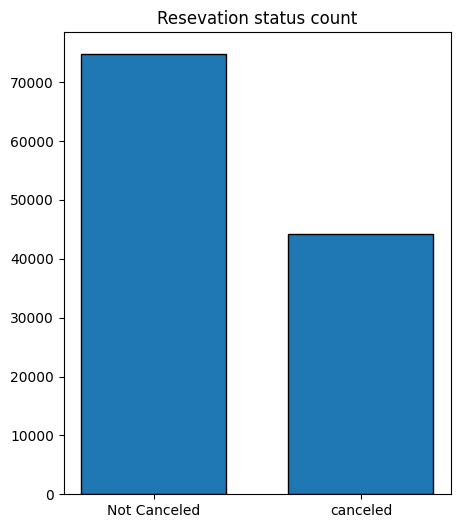

In [137]:
## We calculats the percentage of is_canceled

cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)
plt.figure(figsize= (5,6))
plt.title('Resevation status count')
plt.bar(['Not Canceled', 'canceled'],df['is_canceled'].value_counts(), edgecolor='k', width=0.7)
plt.show()

#### We calculate the cancelatio ration and not cancellation ratio  depending on hotels

Text(0, 0.5, 'Number of Reservation')

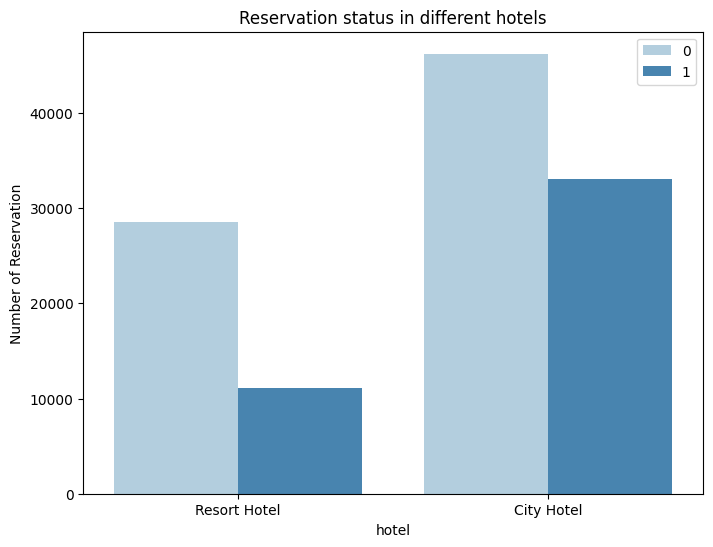

In [138]:
plt.figure(figsize= (8,6))
ax1 = sns.countplot(x = 'hotel', hue='is_canceled', data =df, palette= 'Blues')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels')
plt.xlabel('hotel')
plt.ylabel('Number of Reservation')

##### We Calculate the How many percentage resort Hotel of reservation  is_cancenled or not canceled out of 100:

In [139]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [140]:
# We now calculate percentage of city hotel reservation is_canceled and not canceled

city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [141]:
# We calculate the effect of price on Resort_hotel & city_hotel

resort_hotel = resort_hotel.groupby('reservation_status_date') [['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date') [['adr']].mean()

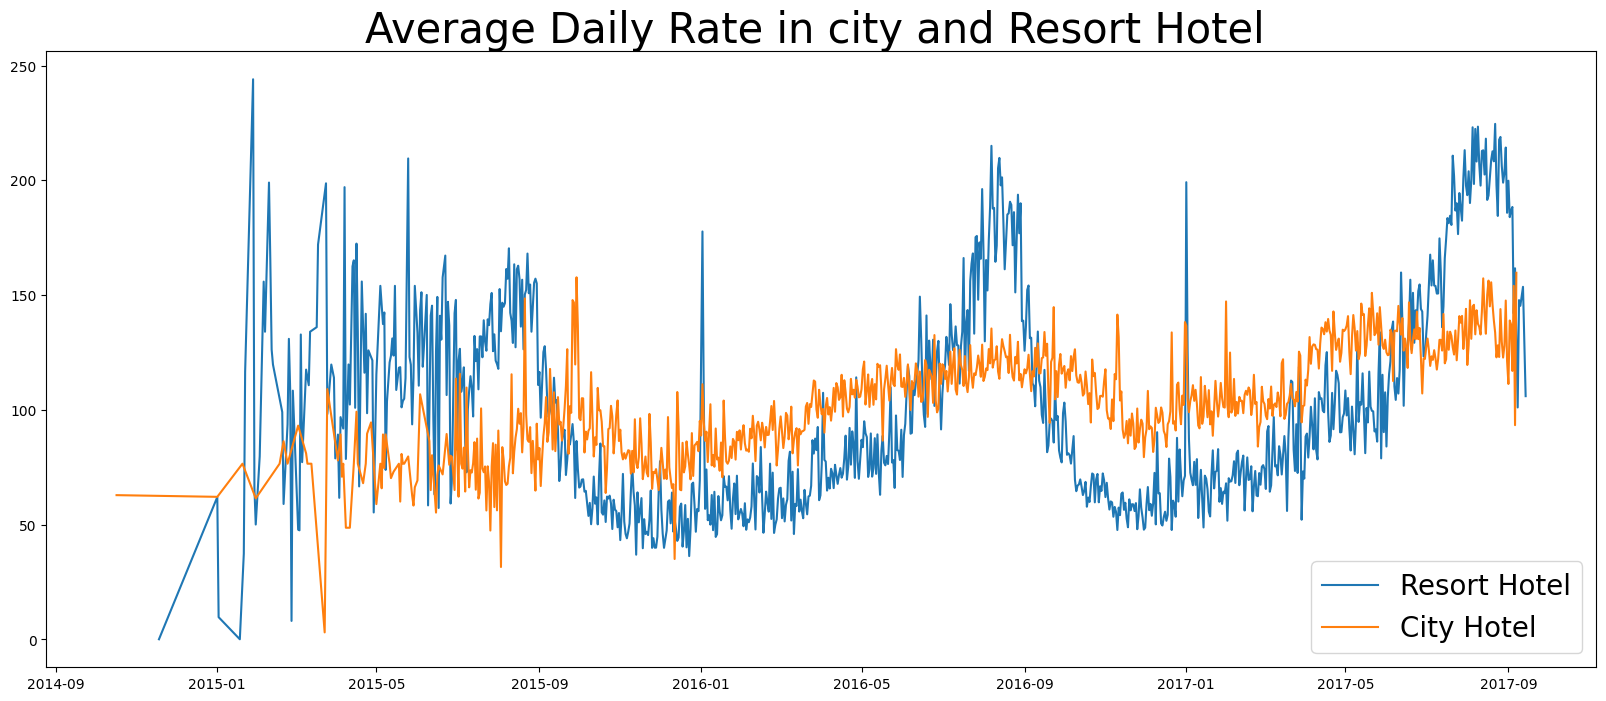

In [142]:
# Here we'll visulize 

plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in city and Resort Hotel ', fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize=20)
plt.show()

Notes: 
    City Hotel price is less than Resort Hotel Price For Somedays, days can be holidays, weekend.

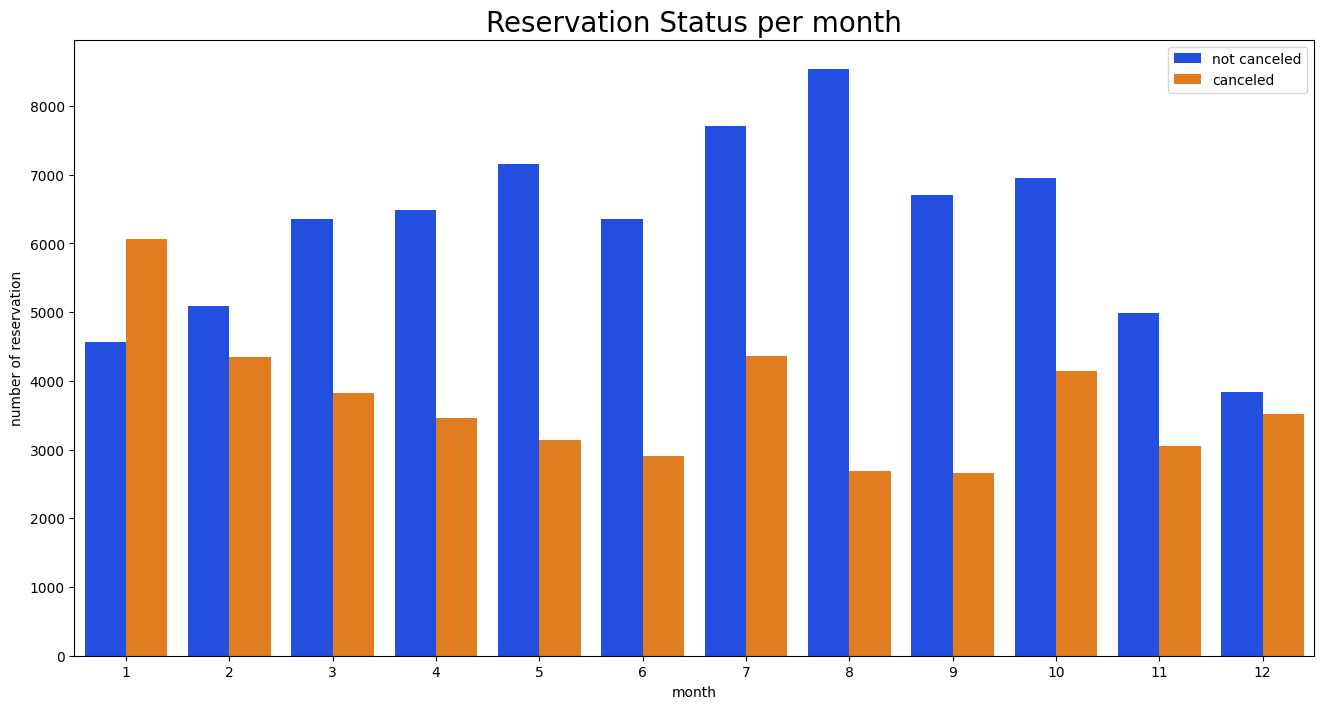

In [143]:
# We can see Monthly Reservation and cancellation
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month', hue ='is_canceled', data =df, palette = 'bright')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor = (1,1))
plt.title('Reservation Status per month', size = 20)
plt.xlabel('month')
plt.ylabel("number of reservation")
plt.legend(['not canceled', 'canceled'])
plt.show()

Note:
January month high performance shows the canceled and reservation is very low in december month .....and in August month is very low canceled performance and reservation high is august month.

Conclusion -> Here When our cancelation is less then Reservation is more...And when our  cancelation is more then Reservation is less.

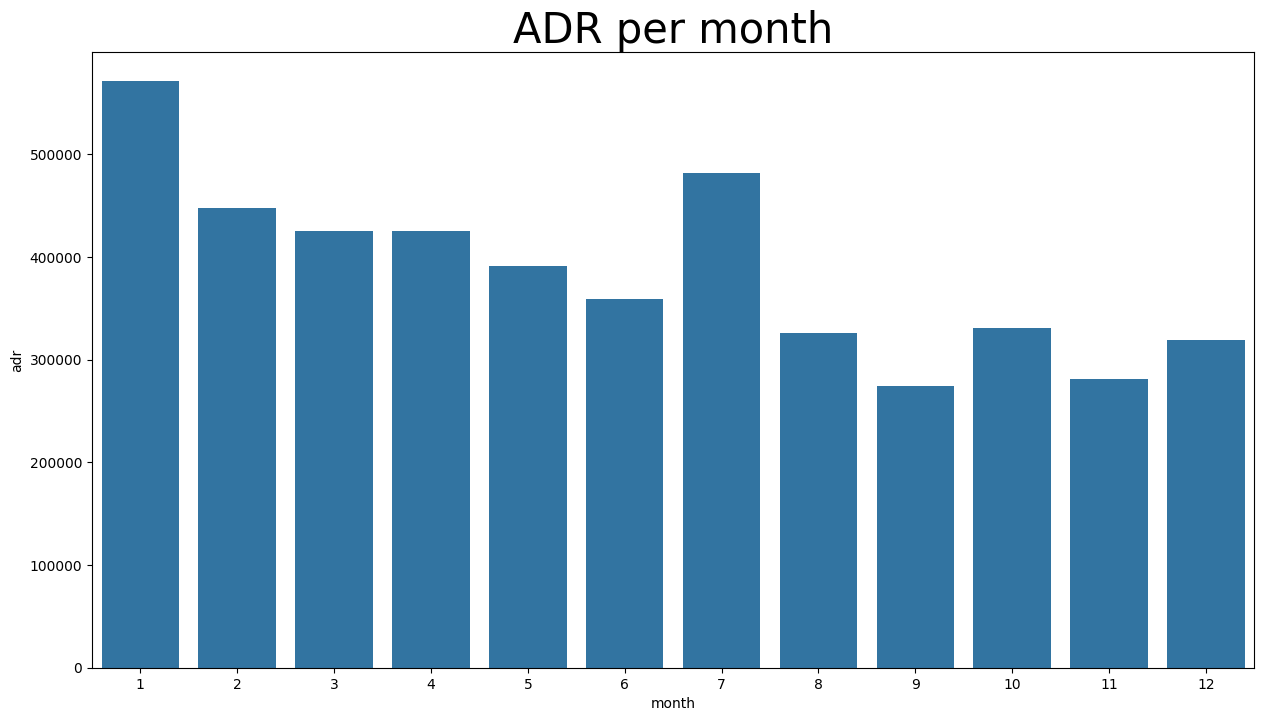

In [144]:
# We see effect of price on cancelation.
plt.figure(figsize=(15,8))
plt.title('ADR per month', fontsize=30)

sns.barplot(x='month',y='adr', data=df[df['is_canceled'] == 1].groupby('month', as_index=False)['adr']
         .sum())
plt.show()


Note:
It's proove that: there high cancelation in january month and lowest cancelation is August month.

## Hypothesis:
It's proove that When Price is higher then reseervation will canceled.

### We calculate the Reservation cancelation based on Counrty

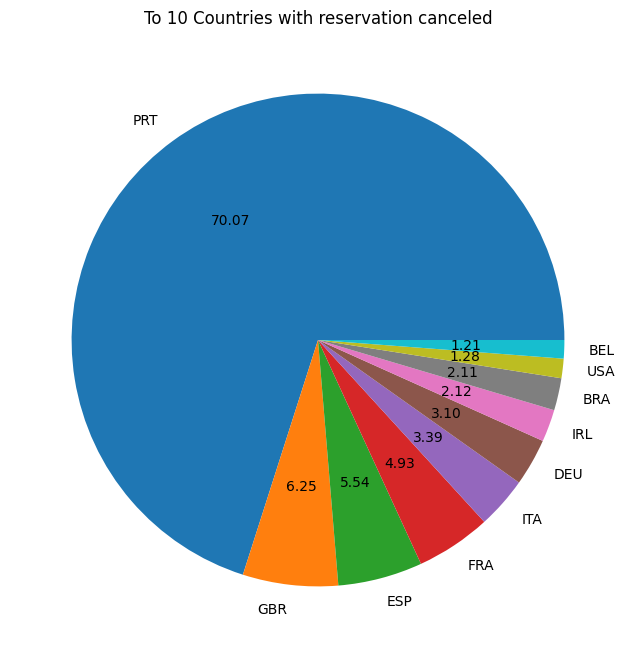

In [145]:
canceled_data = df[df['is_canceled']==1]
top_10_country = canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('To 10 Countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [146]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [147]:
df['market_segment'].value_counts(normalize = True)  # we calculate the Percentage

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [148]:
canceled_data['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

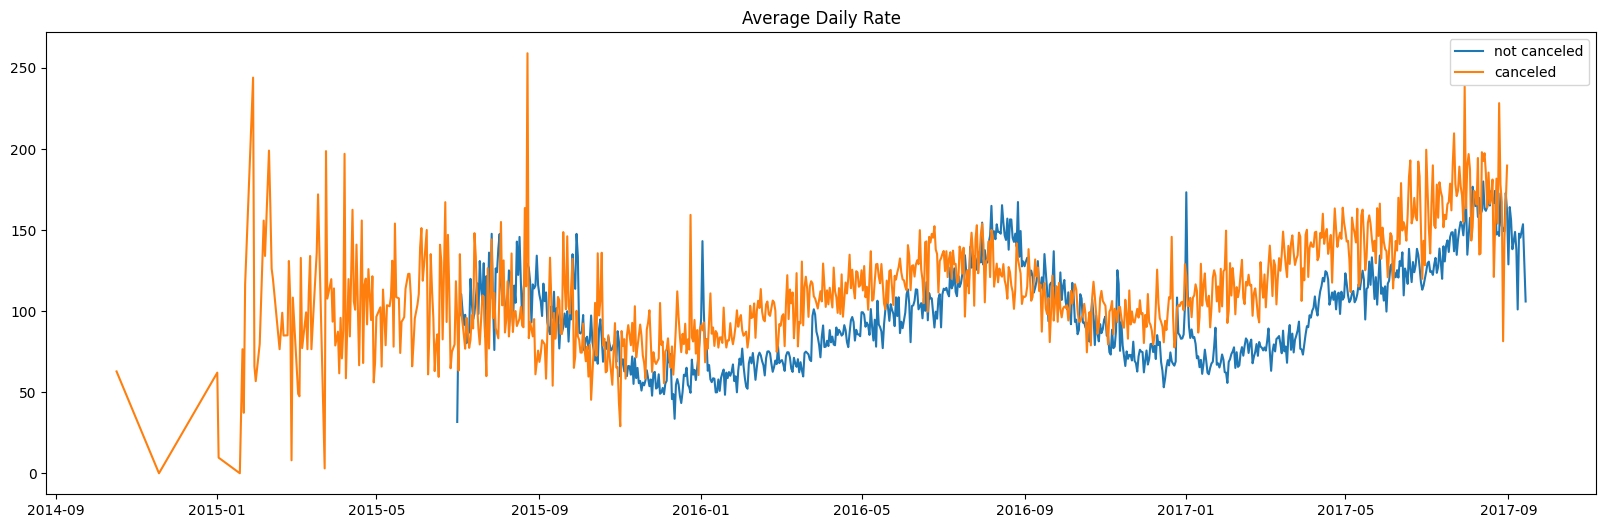

In [149]:
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace =True)
canceled_df_adr.sort_values('reservation_status_date',inplace =True)

not_canceled_data = df[df['is_canceled'] == 0]
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace =True)
not_canceled_df_adr.sort_values('reservation_status_date',inplace =True)

plt.figure(figsize= (20,6))
plt.title('Average Daily Rate')
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'], label = 'not canceled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label = 'canceled')
plt.legend()

In [150]:
canceled_df_adr = canceled_df_adr[(canceled_df_adr['reservation_status_date']> '2016') & (canceled_df_adr['reservation_status_date'] <'2017-09')]
not_canceled_data = not_canceled_data[(not_canceled_data['reservation_status_date']>'2026') & (not_canceled_data['reservation_status_date'] < '2027-09')]

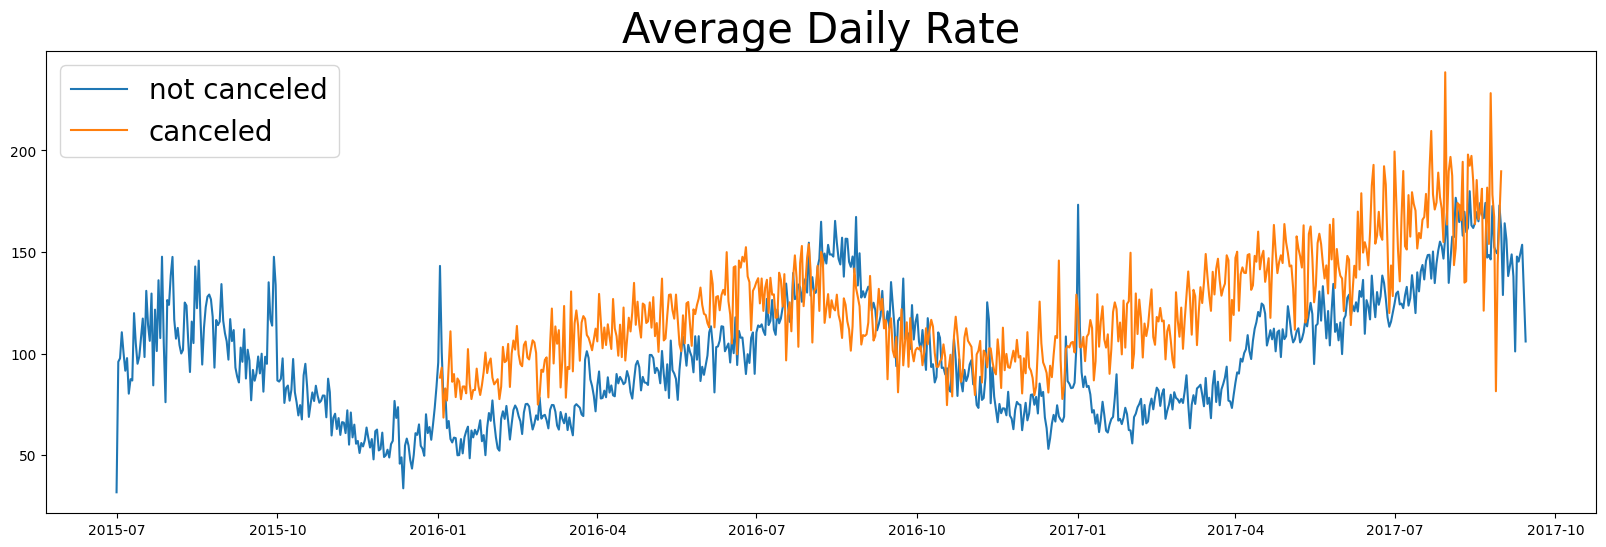

In [153]:
plt.figure(figsize= (20,6))
plt.title('Average Daily Rate', fontsize = 30)
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'], label = 'not canceled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label = 'canceled')
plt.legend(fontsize =20)